<a href="https://colab.research.google.com/github/Chris-Barrera/Project4_Basketball/blob/main/Project_4_Basketball_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from pathlib import Path
from sklearn.linear_model import LinearRegression
import seaborn as ns


In [ ]:
file_path = Path("BasketBallRevised - basketball_cleaned.csv")
df_basketball = pd.read_csv(file_path)
df_basketball.head()

,Player,YearsInLeague,GamesPlayed,MinutesPlayed,FieldGoal,FieldGoalAttempt,3PointsMade,3PointAttempts,FreeThrow,FreeThrowAttempts,...,FieldGoal%,3Pointer%,FreeTthrow%,MinutesPlayedPerGame,MinutesPlayedPerGame.1,TotalReboundsPerGames,AssitPerGame,BirthDate,BirthCity,BirthState
0,Keith Askins,9,486,7983,677,1688,275,774,223,311,...,0.401,0.355,0.717,16.4,3.8,2.9,0.8,"Dec 15, 1967",Athens,Alabama
1,Charles Barkley*,16,1073,39330,8435,15605,538,2020,6349,8643,...,0.541,0.266,0.735,36.7,22.1,11.7,3.9,"Feb 20, 1963",Leeds,Alabama
2,Eric Bledsoe,7,380,10039,1657,3709,294,890,1042,1325,...,0.447,0.330,0.786,26.4,12.2,3.7,4.4,"Dec 9, 1989",Birmingham,Alabama
3,Tom Boswell,6,366,7046,1096,2058,6,11,623,860,...,0.533,0.545,0.724,19.3,7.7,4.7,1.6,"Oct 2, 1953",Montgomery,Alabama
4,Jason Caffey,8,462,9045,1276,2652,0,8,816,1282,...,0.481,0.000,0.637,19.6,7.3,4.4,0.9,"Jun 12, 1973",Mobile,Alabama


In [ ]:
X = df_basketball["3PointsMade"].values.reshape(-1,1)

X[:5]

array([[275],
       [538],
       [294],
       [  6],
       [  0]])

In [ ]:
y = df_basketball["GamesPlayed"]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
print(f"Model's slope: {model.coef_}")

Model's slope: [0.53110939]


In [ ]:
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 297.57072036610714


In [ ]:
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 297.57072036610714 + 0.5311093920163602X


In [ ]:
predicted_y_values = model.predict(X)

In [ ]:
df_basketball_predicted = df_basketball.copy()
df_basketball_predicted["basketball_predicted"] = predicted_y_values
df_basketball_predicted.head()

,Player,YearsInLeague,GamesPlayed,MinutesPlayed,FieldGoal,FieldGoalAttempt,3PointsMade,3PointAttempts,FreeThrow,FreeThrowAttempts,...,3Pointer%,FreeTthrow%,MinutesPlayedPerGame,MinutesPlayedPerGame.1,TotalReboundsPerGames,AssitPerGame,BirthDate,BirthCity,BirthState,basketball_predicted
0,Keith Askins,9,486,7983,677,1688,275,774,223,311,...,0.355,0.717,16.4,3.8,2.9,0.8,"Dec 15, 1967",Athens,Alabama,443.625803
1,Charles Barkley*,16,1073,39330,8435,15605,538,2020,6349,8643,...,0.266,0.735,36.7,22.1,11.7,3.9,"Feb 20, 1963",Leeds,Alabama,583.307573
2,Eric Bledsoe,7,380,10039,1657,3709,294,890,1042,1325,...,0.330,0.786,26.4,12.2,3.7,4.4,"Dec 9, 1989",Birmingham,Alabama,453.716882
3,Tom Boswell,6,366,7046,1096,2058,6,11,623,860,...,0.545,0.724,19.3,7.7,4.7,1.6,"Oct 2, 1953",Montgomery,Alabama,300.757377
4,Jason Caffey,8,462,9045,1276,2652,0,8,816,1282,...,0.000,0.637,19.6,7.3,4.4,0.9,"Jun 12, 1973",Mobile,Alabama,297.570720


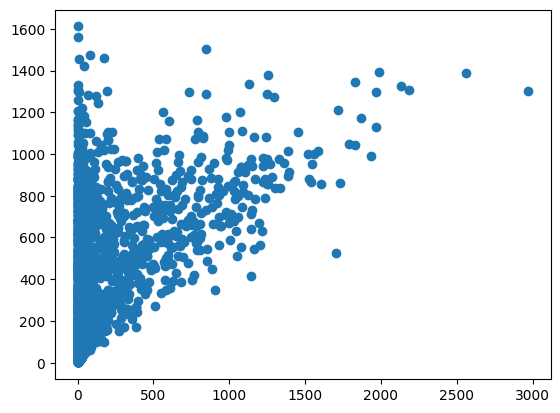

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [ ]:
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.24820721533017165.
The r2 is 0.24820721533017165.
The mean squared error is 83937.13857120369.
The root mean squared error is 289.71906835968474.
The standard deviation is 334.1396422989853.
